In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [22]:
cars=pd.read_csv("Toyota.csv")
cars.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [23]:
cars.drop("Unnamed: 0",axis=1)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [24]:
cars.drop_duplicates(keep='first',inplace=True)

In [25]:
len(cars)

1436

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 134.6+ KB


# Data Cleaning

In [27]:
#Kilometer has been read as object(means there is some special character and numeric value) instead of integer.
# Hp has been read as object instead of integer.
# Metcolor has been read as float64 since it has 1.0/0.0 values.
# Automatic has been read as int64 instead of object
# Doors has been read as object (means there is some string other than integer)

In [28]:
np.unique(cars['KM'])

array(['1', '10000', '100123', ..., '99865', '99971', '??'], dtype=object)

In [29]:
#'??' is string object in km

In [30]:
np.unique(cars['HP'])

array(['107', '110', '116', '192', '69', '71', '72', '73', '86', '90',
       '97', '98', '????'], dtype=object)

In [31]:
#"????" is there

In [32]:
np.unique(cars['Doors'])

array(['2', '3', '4', '5', 'five', 'four', 'three'], dtype=object)

In [33]:
# first of all replace Missing values with Nan values

In [34]:
cars=pd.read_csv("Toyota.csv",na_values=["??","????"])
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 123.5+ KB


In [35]:
#changing the datatype

In [36]:
cars['MetColor']=cars["MetColor"].astype("object")
cars['Automatic']=cars["Automatic"].astype("object")
cars['Doors']=cars["Doors"].astype("object")


In [37]:
#cleaning col. door
cars['Doors'].replace('three','3',inplace=True)
cars['Doors'].replace('four','4',inplace=True)
cars['Doors'].replace('five','5',inplace=True)
np.unique(cars['Doors'])

array(['2', '3', '4', '5'], dtype=object)

In [38]:
#cars["Doors"]=cars["Doors"].astype("int64")

In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1421 non-null   float64
 4   FuelType    1336 non-null   object 
 5   HP          1430 non-null   float64
 6   MetColor    1286 non-null   object 
 7   Automatic   1436 non-null   object 
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 123.5+ KB


In [40]:
cars1=cars.copy()
cars2=cars.copy()

# Identification and Imputation of Missing Values

In [41]:
cars1.isna().sum()

Unnamed: 0      0
Price           0
Age           100
KM             15
FuelType      100
HP              6
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [42]:
#3 columns containing null values
#subsetting the rows containg one or more missing values
nan_counts = cars1.isna().sum(axis=1)  #gives no. of nan values in a row
nan_counts
cars1_nan=cars[nan_counts>1]
cars1_nan

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
6,6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
9,9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105
29,29,17950,30.0,11090.0,NaN,110.0,NaN,0,1600,3,1120
109,109,32500,NaN,1.0,NaN,116.0,0.0,0,2000,5,1480
119,119,22250,NaN,57313.0,NaN,110.0,1.0,0,2000,5,1275
160,160,18950,16.0,11000.0,NaN,110.0,NaN,0,1600,4,1105
163,163,19500,14.0,6500.0,NaN,110.0,NaN,0,1600,4,1100
226,226,11950,NaN,65988.0,Petrol,110.0,NaN,0,1600,3,1040
548,548,10750,56.0,43700.0,NaN,86.0,NaN,0,1300,3,1025
586,586,9950,NaN,29650.0,Petrol,86.0,NaN,0,1300,3,1025


In [43]:
cars1_m=cars1.drop(cars1_nan.index)
len(cars1_m)

1408

In [44]:
cars1_m.describe()

,Unnamed: 0,Price,Age,KM,HP,CC,Weight
count,1408.000000,1408.000000,1319.000000,1396.000000,1405.000000,1408.000000,1408.000000
mean,717.659801,10704.629972,55.717968,68880.445559,101.473310,1565.743608,1072.012074
std,413.335846,3572.305340,18.551595,37332.756073,14.796344,186.284378,51.327694
min,0.000000,4350.000000,1.000000,1.000000,69.000000,1300.000000,1000.000000
25%,359.750000,8450.000000,43.000000,43505.750000,90.000000,1400.000000,1040.000000
50%,719.500000,9900.000000,60.000000,63634.500000,110.000000,1600.000000,1070.000000
75%,1076.250000,11950.000000,70.000000,87295.000000,110.000000,1600.000000,1085.000000
max,1435.000000,31275.000000,80.000000,243000.000000,192.000000,2000.000000,1615.000000


In [45]:
cars1_m['Age'].fillna(cars["Age"].mean(),inplace=True)
cars1_m['KM'].fillna(cars["KM"].median(),inplace=True)
cars1_m['HP'].fillna(cars["HP"].mean(),inplace=True)

In [46]:
print(cars1_m["FuelType"].value_counts())
cars1_m["MetColor"].value_counts()


Petrol    1172
Diesel     142
CNG         15
Name: FuelType, dtype: int64


1.0    864
0.0    415
Name: MetColor, dtype: int64

In [47]:
cars1_m["MetColor"].fillna(cars1_m["MetColor"].value_counts().index[0],inplace=True)
cars1_m["FuelType"].fillna(cars1_m["FuelType"].value_counts().index[0],inplace=True)

In [48]:
cars1_m.isna().sum()

cars2=cars1_m.copy()
cars3=cars1_m.copy()

# Exploratory Data Analysis

<Axes: >

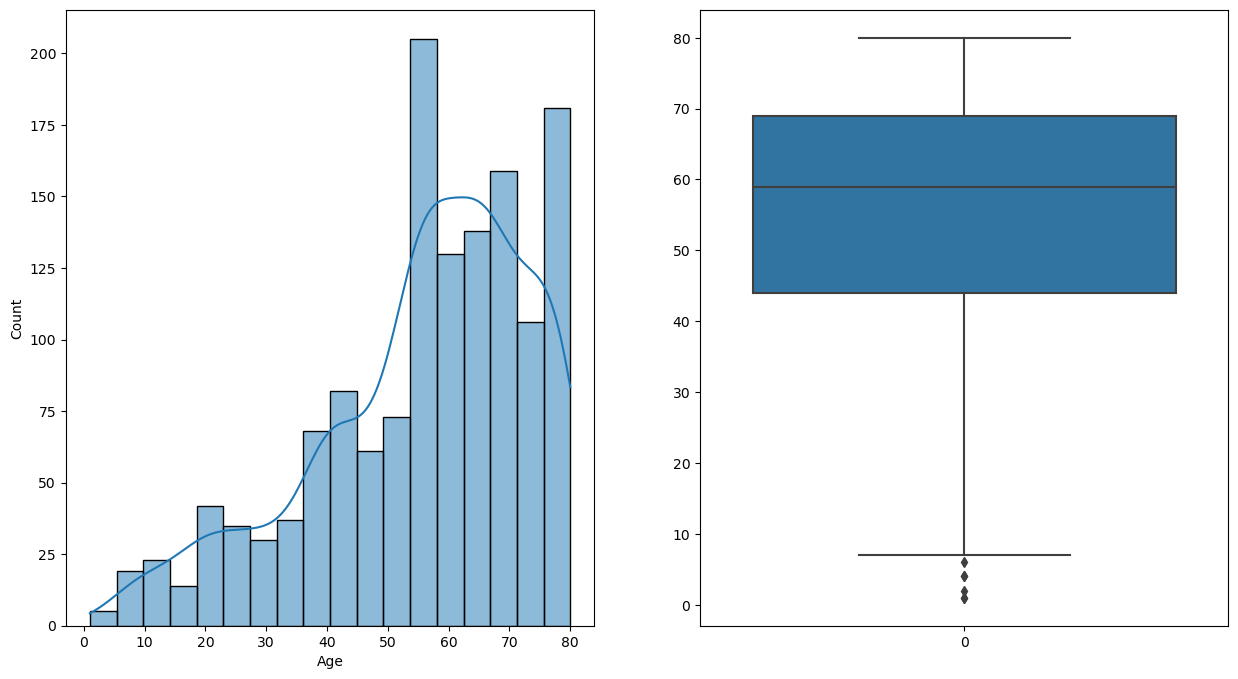

In [49]:
#Age
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['Age'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['Age'])

<Axes: >

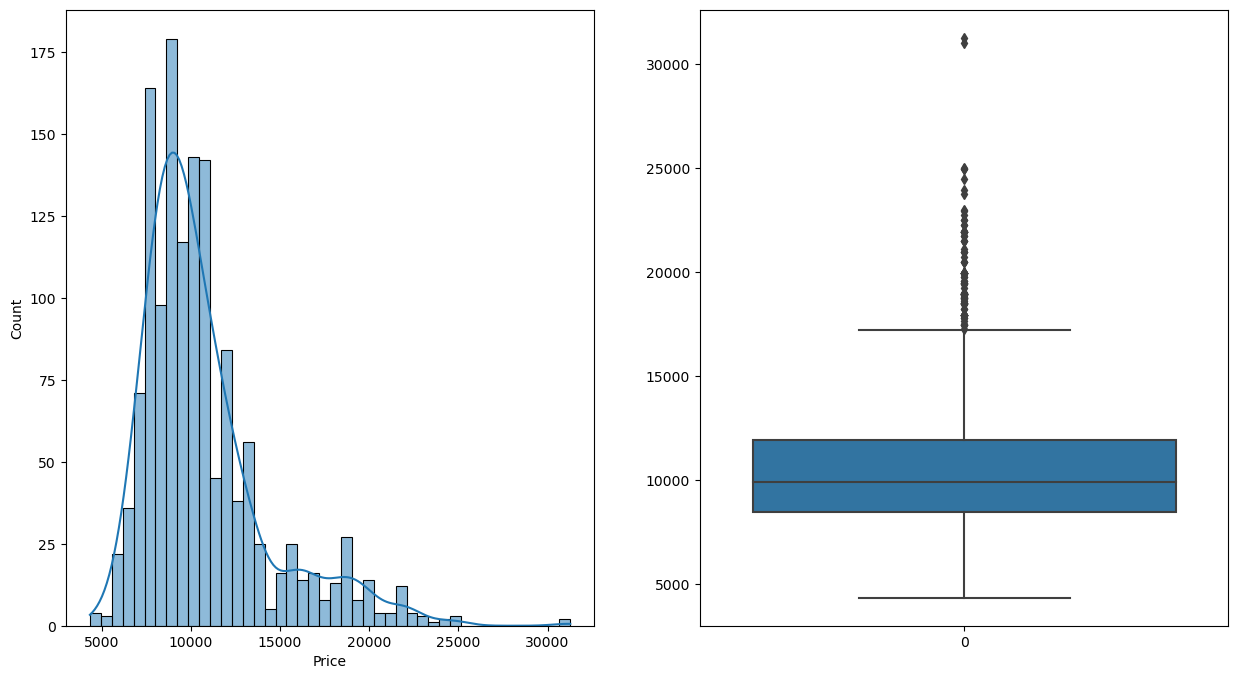

In [50]:
#price
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['Price'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['Price'])

<Axes: >

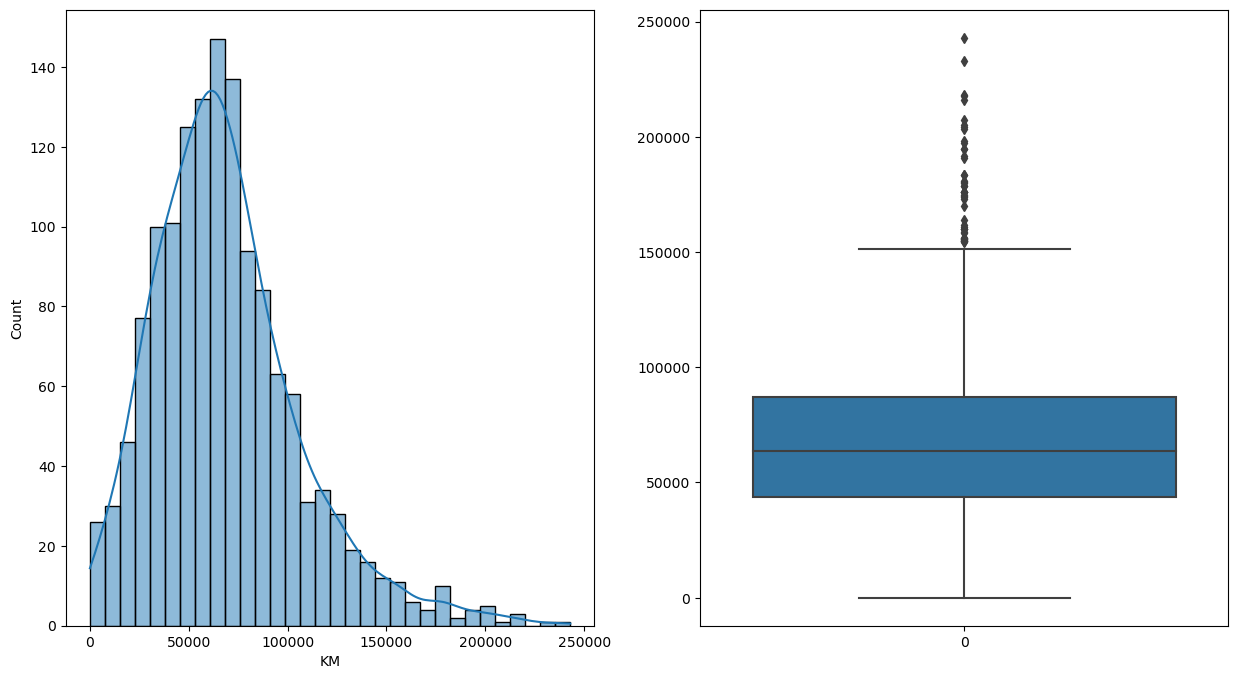

In [51]:
#KM
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['KM'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['KM'])

<Axes: >

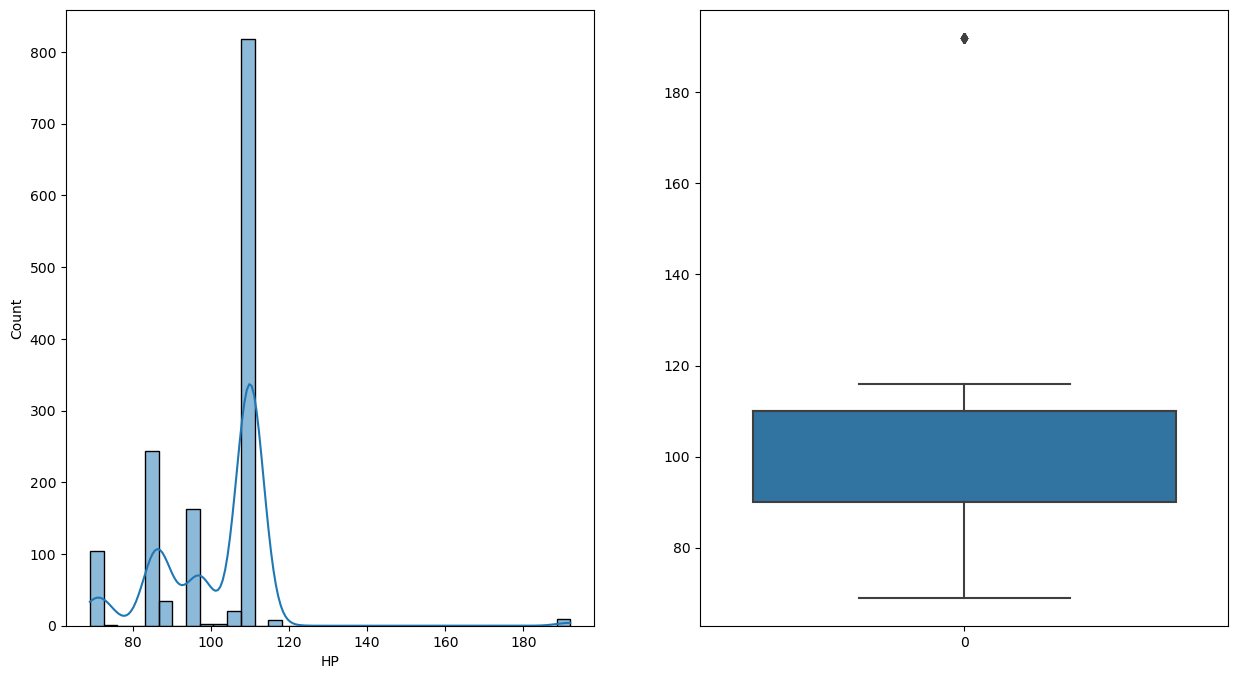

In [52]:
#HP
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['HP'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['HP'])

<Axes: >

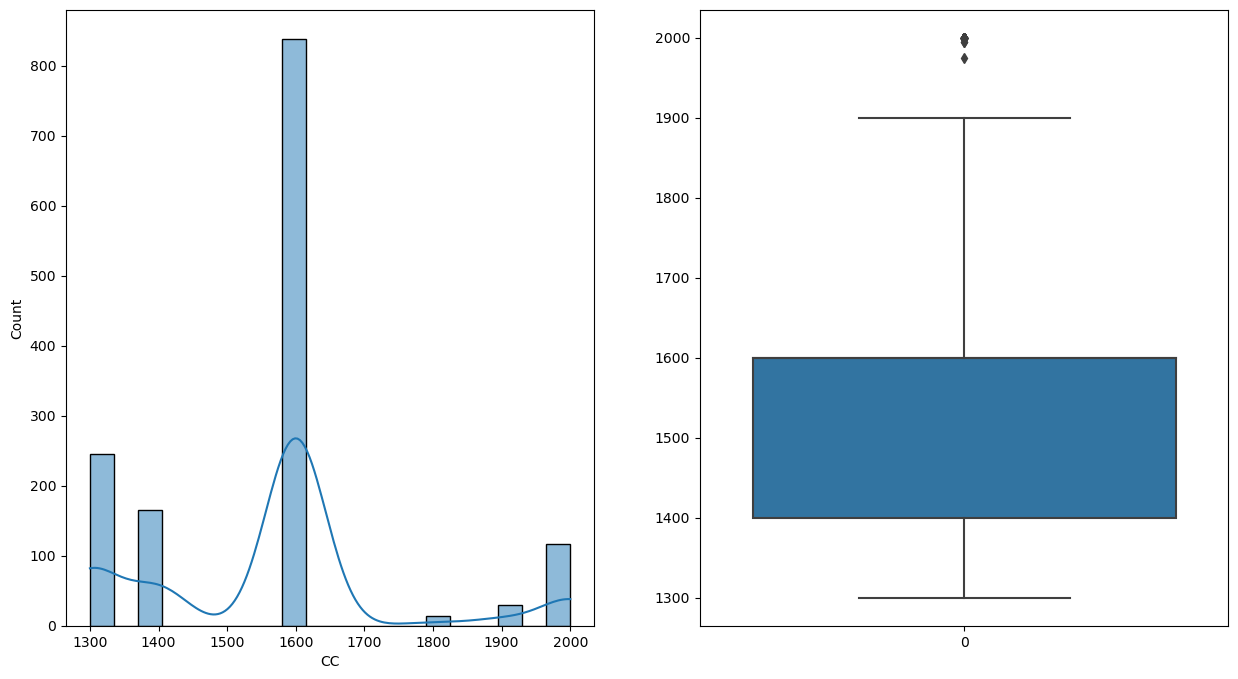

In [53]:
#CC
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['CC'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['CC'])

<Axes: >

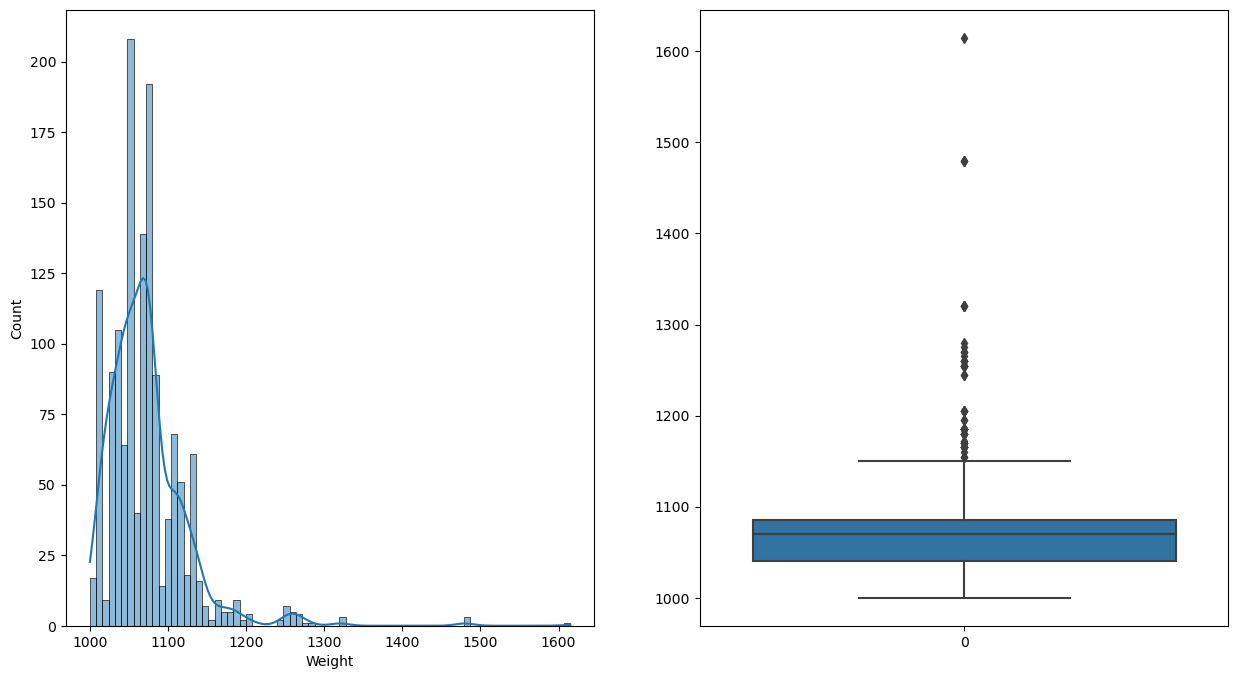

In [54]:
#Weight
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
sns.histplot(cars1_m['Weight'],kde=True)
plt.subplot(1,2,2)
sns.boxplot(cars1_m['Weight'])

<Axes: xlabel='Doors', ylabel='Price'>

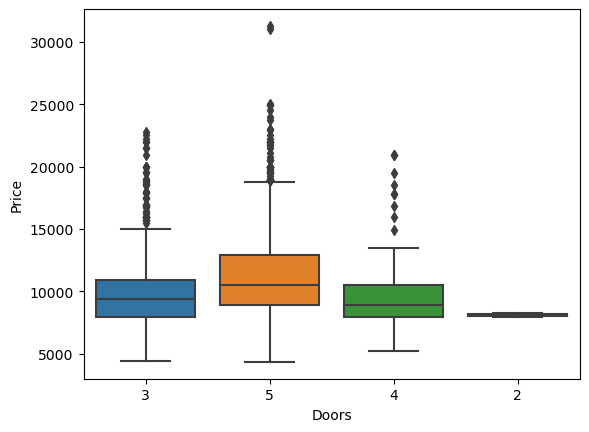

In [55]:
sns.boxplot(x=cars1_m['Doors'],y=cars1_m['Price'])
# Different no. of doors have different price distribution.
# 5 doors have correspondingly higher price ranges

<Axes: xlabel='MetColor', ylabel='Price'>

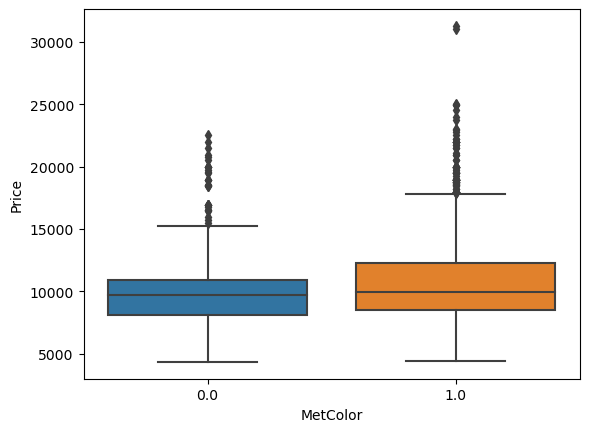

In [56]:
sns.boxplot(x=cars1_m['MetColor'],y=cars1_m['Price'])
# pressence of metallic color have higher price ranges as well as higher median price.

Age         0.859060
KM          0.570277
Weight      0.564084
HP          0.310408
CC          0.149603
MetColor    0.107976
Name: Price, dtype: float64

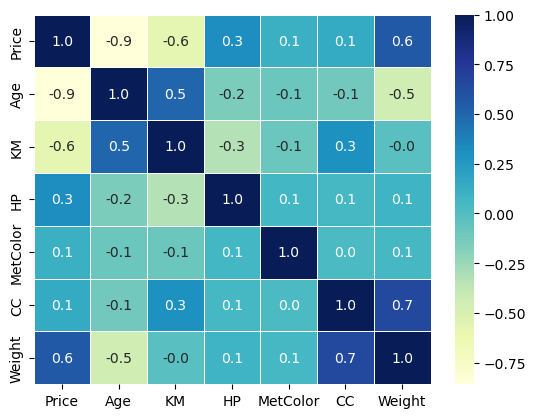

In [57]:
cars1_m = cars1_m.drop("Unnamed: 0", axis = 1)
cars_=cars1_m.select_dtypes(exclude=[object])
#correlation=cars_select1.corr()
#print(correlation)
sns.heatmap(cars_.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".1f")
#round(correlation,3)   
cars_.corr().loc[:,'Price'].abs().sort_values(ascending=False)[1:]

# Model 1 : Keeping Outliers in Data

In [58]:

cars_d=pd.get_dummies(cars1_m,drop_first=True)
cars_d.shape

C:\Users\gm205\AppData\Local\Temp\ipykernel_11824\4268220688.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cars_d=pd.get_dummies(cars1_m,drop_first=True)


(1408, 13)

In [59]:
# model building
# IMPORTING NECESSARY LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [60]:
y=cars_d["Price"]
x=cars_d.drop(['Price','CC','Weight'], axis='columns', inplace=False)
x.head()

,Age,KM,HP,MetColor,FuelType_Diesel,FuelType_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5
0,23.0,46986.0,90.0,1.0,1,0,0,1,0,0
1,23.0,72937.0,90.0,1.0,1,0,0,1,0,0
2,24.0,41711.0,90.0,1.0,1,0,0,1,0,0
3,26.0,48000.0,90.0,0.0,1,0,0,1,0,0
4,30.0,38500.0,90.0,0.0,1,0,0,1,0,0


In [61]:
from scipy.stats import boxcox
y,lambda_value=boxcox(y)
y
np.mean(y)

1.293712823279462

In [62]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.mean(y_test))

(985, 10) (423, 10) (985,) (423,)
1.2937293686215636


In [63]:
"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)

# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

1.2937293686215636
0.00022442462358727197


0.00010020576541161893
0.7957981635831732
0.8006370696594014 0.7415859497887438


<Axes: title={'center': 'plot of residuals for test data'}>

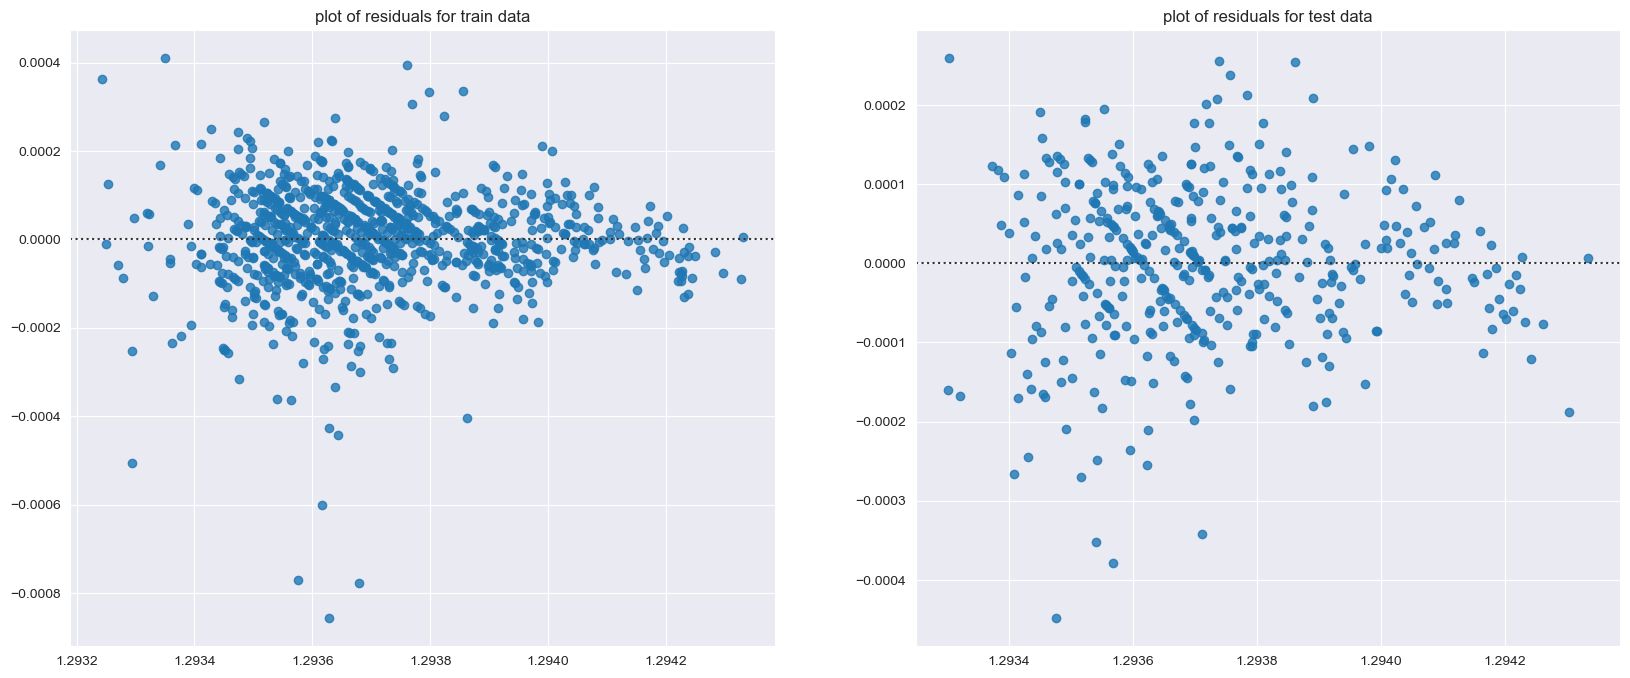

In [93]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

# Model
model_lin1=lgr.fit(X_train,y_train)

# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)


# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
adj_r2=1-((1-r2_lin_test1)*(422/412))
print(adj_r2)
print(r2_lin_test1,r2_lin_train1)

# Regression diagnostics- Residual plot analysis
# residuals1=y_test-cars_predictions_lin1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('plot of residuals for train data')
residuals1=y_train-lgr.predict(X_train)
sns.residplot(x=lgr.predict(X_train), y=residuals1)
plt.subplot(1,2,2)
plt.title('plot of residuals for test data')
residuals2=y_test-cars_predictions_lin1
sns.residplot(x=cars_predictions_lin1, y=residuals2)

Text(0.5, 1.0, 'test data')

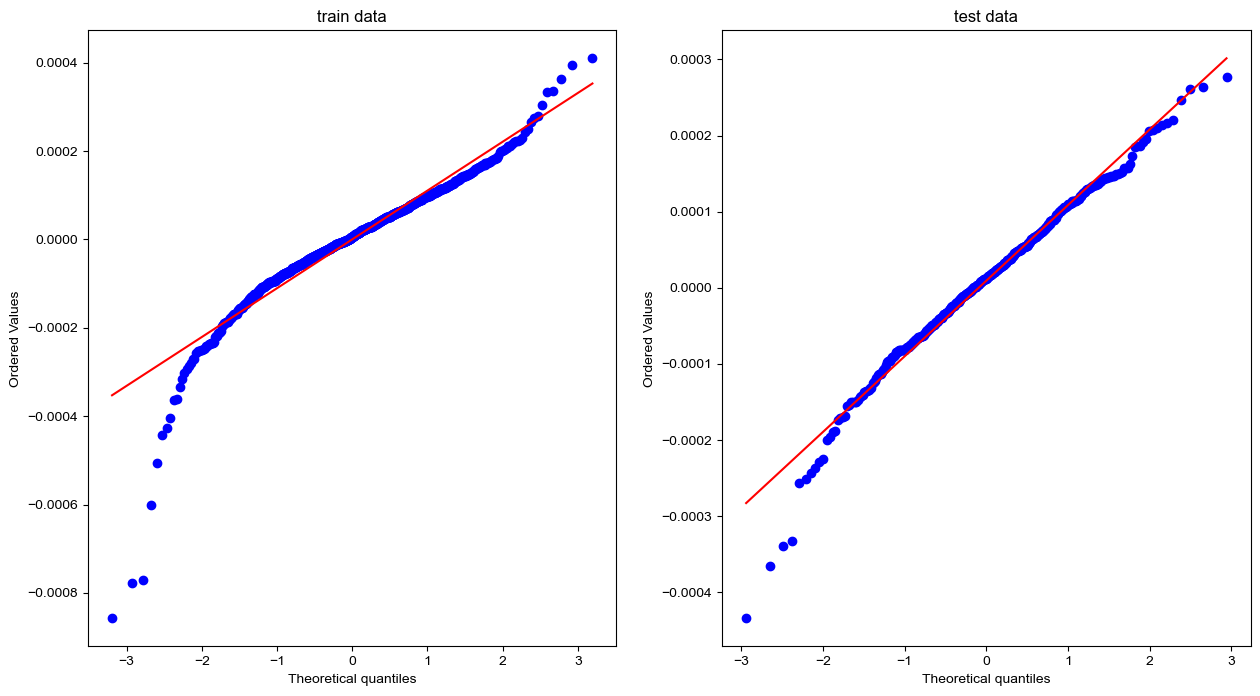

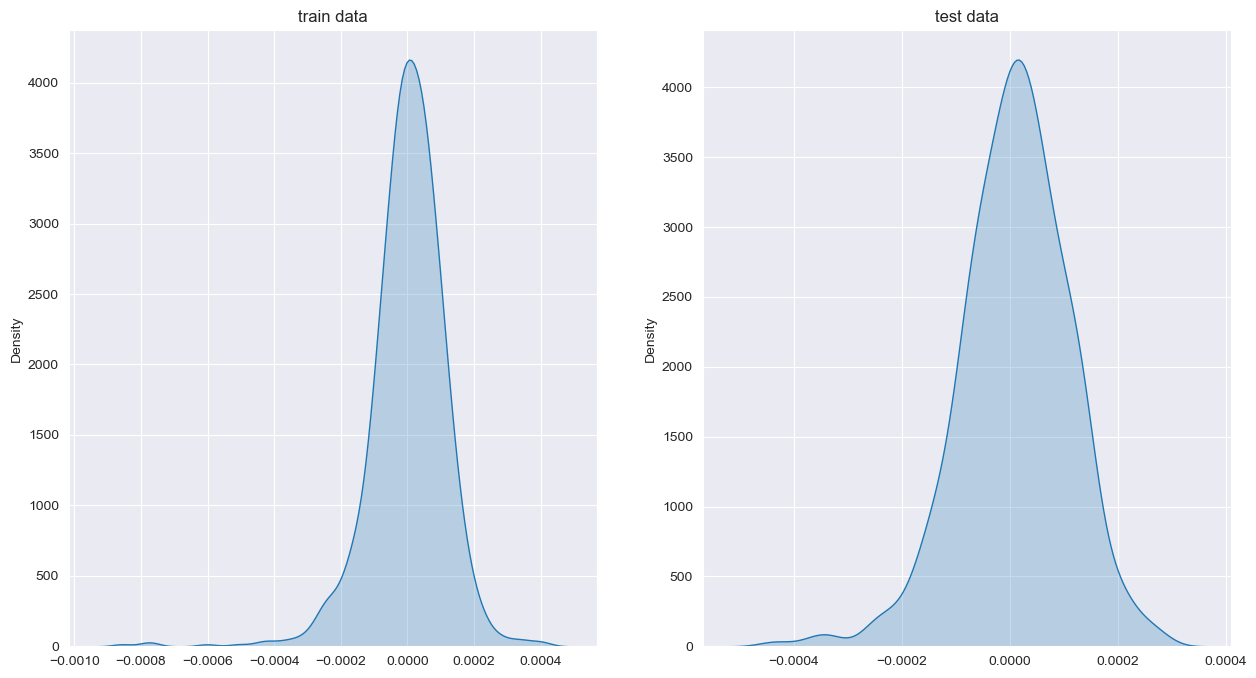

In [65]:
from scipy.stats import probplot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
probplot(residuals1,dist="norm",plot=plt)
plt.title("train data")
plt.subplot(1,2,2)
probplot(residuals2,dist="norm",plot=plt)
plt.title("test data")
b=6 #not of any use
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.kdeplot(residuals1,fill=True)
plt.title("train data")
plt.subplot(1,2,2)
sns.kdeplot(residuals2,fill=True)
plt.title("test data")

# Model 2 : Removing Outliers and Then Fitting

In [66]:
q1 = cars2['KM'].quantile(0.25)
q3 = cars2['KM'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
cars2=cars2[(cars2.KM<=ub)&(cars2.KM>=lb)]


In [67]:
q1 = cars2['Weight'].quantile(0.25)
q3 = cars2['Weight'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
cars2=cars2[(cars2.Weight<=ub)&(cars2.Weight>=lb)]
len(cars2)

1300

In [68]:
q1 = cars2['Age'].quantile(0.25)
q3 = cars2['Age'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
cars2=cars2[(cars2.Age<=ub)&(cars2.Age>=lb)]
len(cars2)

1256

In [69]:
q1 = cars2['CC'].quantile(0.25)
q3 = cars2['CC'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
cars2=cars2[(cars2.CC<=ub)&(cars2.CC>=lb)]
len(cars2)
cars2=cars2.drop(['Unnamed: 0'],axis=1)

In [70]:
cars2_d=pd.get_dummies(cars2,drop_first=True)
y1=cars2_d['Price']
x1=cars2_d.drop(["Price","CC"],axis=1)
print(y1.shape,x1.shape)

(1204,) (1204, 11)


C:\Users\gm205\AppData\Local\Temp\ipykernel_11824\506423677.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cars2_d=pd.get_dummies(cars2,drop_first=True)


In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(842, 11) (362, 11) (842,) (362,)


0.00010020576541161893
0.7823886690829032
0.7890194852604324 0.7945078653564585


<Axes: title={'center': 'plot of residuals for test data'}, ylabel='Price'>

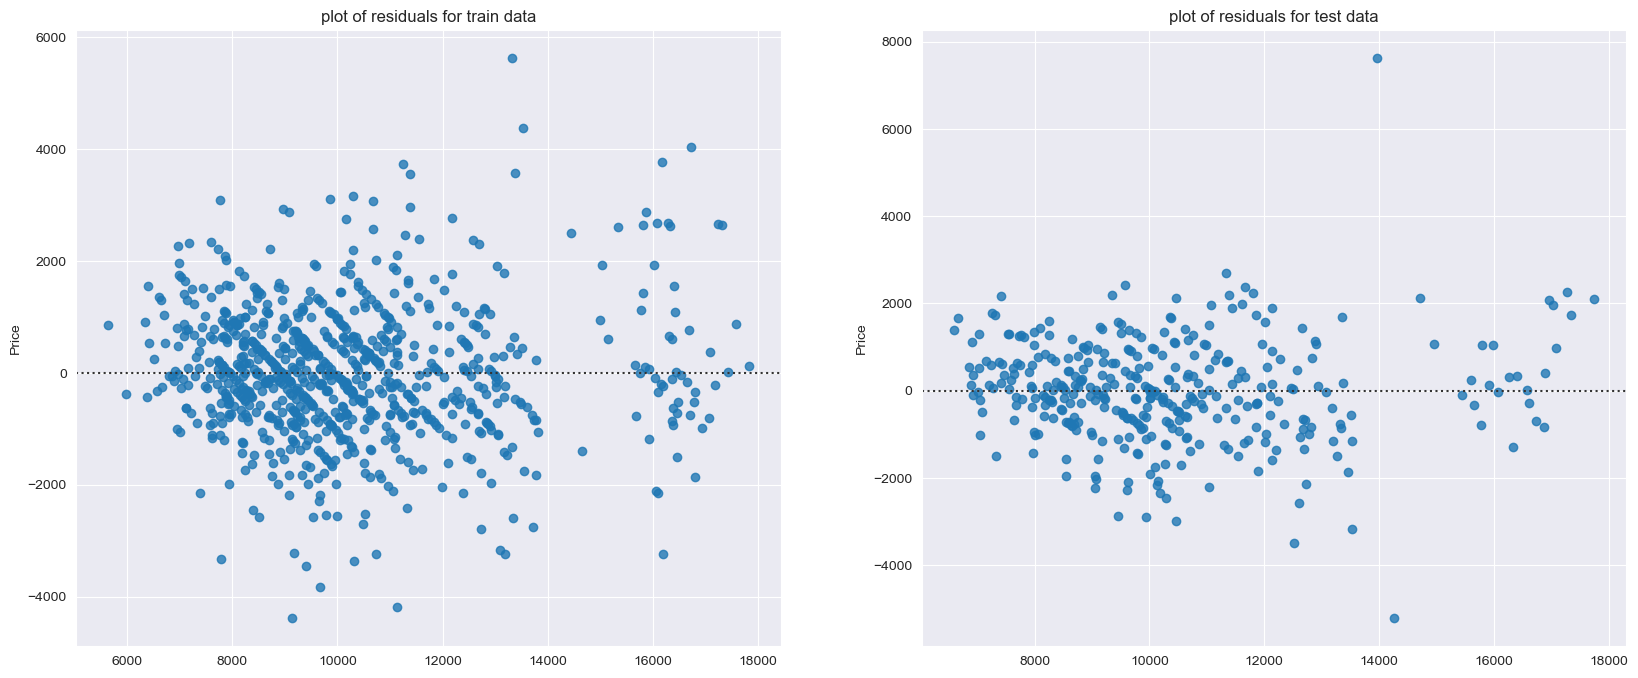

In [95]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

# Model
model_lin2=lgr2.fit(X1_train,y1_train)

# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X1_test)


# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y1_test, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse1)
print(lin_rmse2)

# R squared value
r2_lin_test2=model_lin2.score(X1_test,y1_test)
r2_lin_train2=model_lin2.score(X1_train,y1_train)
adj_r2=1-((1-r2_lin_test2)*(361/350))
print(adj_r2)
print(r2_lin_test2,r2_lin_train2)

# Regression diagnostics- Residual plot analysis
# residuals1=y_test-cars_predictions_lin1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('plot of residuals for train data')
residuals1_=y1_train-lgr2.predict(X1_train)
sns.residplot(x=lgr2.predict(X1_train), y=residuals1_)
plt.subplot(1,2,2)
plt.title('plot of residuals for test data')
residuals2_=y1_test-cars_predictions_lin2
sns.residplot(x=cars_predictions_lin2, y=residuals2_)

Text(0.5, 1.0, 'test data')

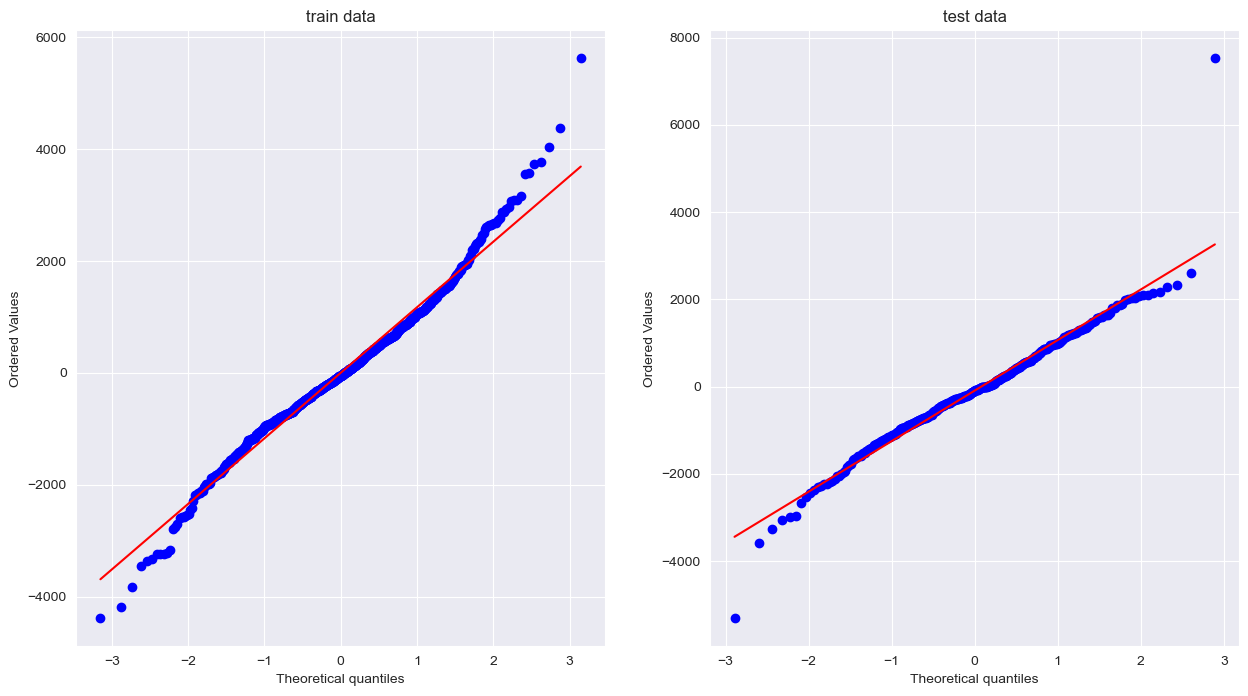

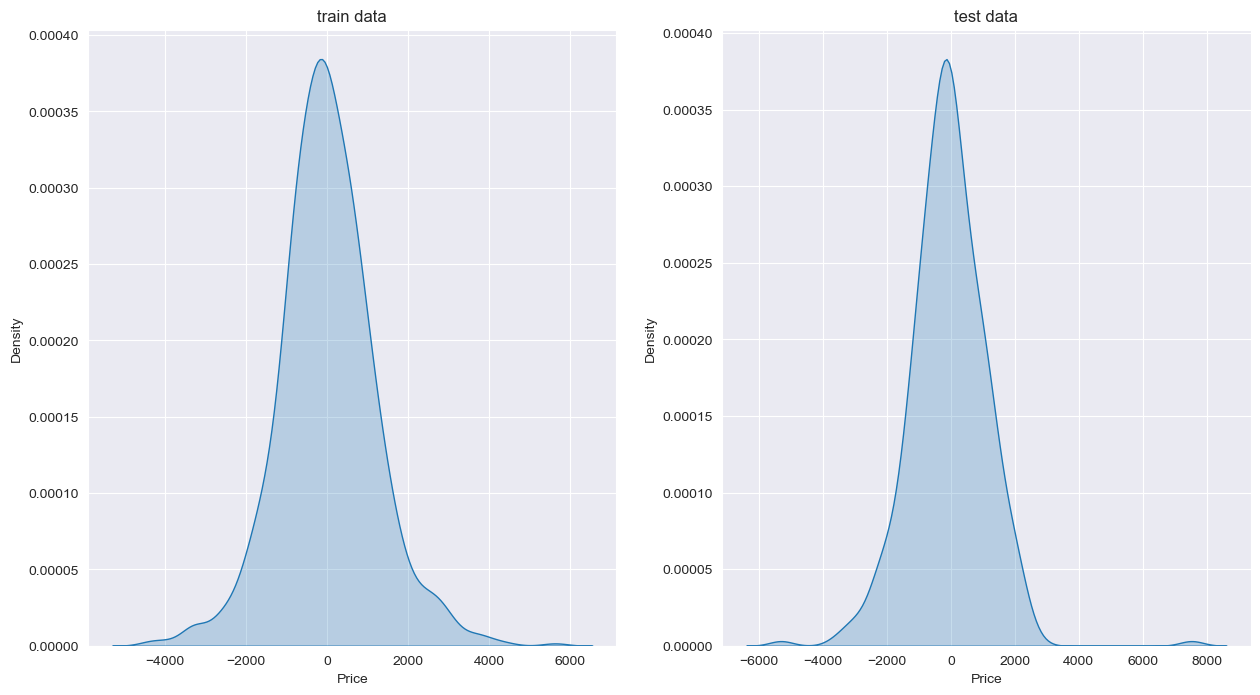

In [73]:
from scipy.stats import probplot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
probplot(residuals1_,dist="norm",plot=plt)
plt.title("train data")
plt.subplot(1,2,2)
probplot(residuals2_,dist="norm",plot=plt)
plt.title("test data")
b=6 #not of any use
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.kdeplot(residuals1_,fill=True)
plt.title("train data")
plt.subplot(1,2,2)
sns.kdeplot(residuals2_,fill=True)
plt.title("test data")

# Model 3: Cook's Distance and Then Backward Elimination

In [74]:
df=cars_d.copy()
df=df.reset_index(drop=True)
df

,Price,Age,KM,HP,MetColor,CC,Weight,FuelType_Diesel,FuelType_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5
0,13500,23.000000,46986.0,90.0,1.0,2000,1165,1,0,0,1,0,0
1,13750,23.000000,72937.0,90.0,1.0,2000,1165,1,0,0,1,0,0
2,13950,24.000000,41711.0,90.0,1.0,2000,1165,1,0,0,1,0,0
3,14950,26.000000,48000.0,90.0,0.0,2000,1165,1,0,0,1,0,0
4,13750,30.000000,38500.0,90.0,0.0,2000,1170,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,8450,80.000000,23000.0,86.0,0.0,1300,1015,0,1,0,1,0,0
1404,7500,55.672156,20544.0,86.0,1.0,1300,1025,0,1,0,1,0,0
1405,10845,72.000000,63634.0,86.0,0.0,1300,1015,0,1,0,1,0,0
1406,8500,55.672156,17016.0,86.0,0.0,1300,1015,0,1,0,1,0,0


In [75]:
x=cars_d.drop(['Price'],axis=1)
x=x.reset_index(drop=True)
x

,Age,KM,HP,MetColor,CC,Weight,FuelType_Diesel,FuelType_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5
0,23.000000,46986.0,90.0,1.0,2000,1165,1,0,0,1,0,0
1,23.000000,72937.0,90.0,1.0,2000,1165,1,0,0,1,0,0
2,24.000000,41711.0,90.0,1.0,2000,1165,1,0,0,1,0,0
3,26.000000,48000.0,90.0,0.0,2000,1165,1,0,0,1,0,0
4,30.000000,38500.0,90.0,0.0,2000,1170,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1403,80.000000,23000.0,86.0,0.0,1300,1015,0,1,0,1,0,0
1404,55.672156,20544.0,86.0,1.0,1300,1025,0,1,0,1,0,0
1405,72.000000,63634.0,86.0,0.0,1300,1015,0,1,0,1,0,0
1406,55.672156,17016.0,86.0,0.0,1300,1015,0,1,0,1,0,0


In [76]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     386.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        13:20:19   Log-Likelihood:                 10850.
No. Observations:                1408   AIC:                        -2.167e+04
Df Residuals:                    1395   BIC:                        -2.161e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2934      0.000   9923.292      0.000       1.293       1.294
Age             -7.596e-06   2.22e-07    -34.249      0.000   -8.03e-06   -7.16e-06
KM              -1.725e-09   1.09e-10    -15.788      0.000   -1.94e-09   -1.51e-09
HP               9.227e-07   3.88e-07      2.375      0.018    1.61e-07    1.68e-06
MetColor         9.465e-06   6.45e-06      1.467      0.143   -3.19e-06    2.21e-05
CC               1.096e-07   3.82e-08      2.870      0.004    3.47e-08    1.84e-07
Weight           5.426e-07    9.9e-08      5.479      0.000    3.48e-07    7.37e-07
FuelType_Diesel -5.506e-05   3.91e-05     -1.407      0.160      -0.000    2.17e-05
FuelType_Petrol  1.485e-05   2.93e-05      0.507      0.612   -4.26e-05    7.23e-05
Automatic_1      3.907e-05   1.32e-05      2.954      0.003    1.31e-05     6.5e-05
Doors_3         -3.786e-05   7.77e-05     -0.487      0.626      -0.000       0.000
Doors_4         -4.946e-05   7.82e-05     -0.633      0.527      -0.000       0.000
Doors_5         -2.322e-05   7.77e-05     -0.299      0.765      -0.000       0.000
==============================================================================
Omnibus:                      478.071   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3489.035
Skew:                          -1.384   Prob(JB):                         0.00
Kurtosis:                      10.198   Cond. No.                     4.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
influence=OLSInfluence(model)
cooks_distance=influence.cooks_distance
cooks=list(cooks_distance)
print(cooks)
cook=cooks[0]

[0       0.000516
1       0.000039
2       0.000301
3       0.000030
4       0.000047
          ...   
1403    0.000158
1404    0.002669
1405    0.002561
1406    0.000937
1407    0.010847
Length: 1408, dtype: float64, array([1., 1., 1., ..., 1., 1., 1.])]


In [78]:
threshold=4/len(cars_d)
influencial_observation=[]
for i in range(len(df)):
    if cook[i]>threshold:
        influencial_observation.append(i)
print("influencial_observation",influencial_observation)
len(influencial_observation)

influencial_observation [6, 12, 46, 80, 89, 102, 106, 107, 112, 113, 176, 182, 183, 184, 185, 192, 214, 216, 322, 371, 385, 394, 404, 590, 597, 603, 625, 636, 638, 640, 656, 745, 941, 1026, 1027, 1028, 1029, 1033, 1035, 1037, 1038, 1043, 1051, 1054, 1055, 1057, 1060, 1062, 1072, 1092, 1094, 1095, 1205, 1228, 1245, 1252, 1279, 1291, 1327, 1337, 1355, 1358, 1407]


63

In [79]:
df_new=df[~df.index.isin(influencial_observation)]

In [80]:
df_new=df_new.reset_index(drop=True)
# df_new.drop(['intercept'],axis=1)
df_new

,Price,Age,KM,HP,MetColor,CC,Weight,FuelType_Diesel,FuelType_Petrol,Automatic_1,Doors_3,Doors_4,Doors_5
0,13500,23.000000,46986.0,90.0,1.0,2000,1165,1,0,0,1,0,0
1,13750,23.000000,72937.0,90.0,1.0,2000,1165,1,0,0,1,0,0
2,13950,24.000000,41711.0,90.0,1.0,2000,1165,1,0,0,1,0,0
3,14950,26.000000,48000.0,90.0,0.0,2000,1165,1,0,0,1,0,0
4,13750,30.000000,38500.0,90.0,0.0,2000,1170,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,8950,78.000000,24000.0,86.0,1.0,1300,1065,0,1,1,0,0,1
1341,8450,80.000000,23000.0,86.0,0.0,1300,1015,0,1,0,1,0,0
1342,7500,55.672156,20544.0,86.0,1.0,1300,1025,0,1,0,1,0,0
1343,10845,72.000000,63634.0,86.0,0.0,1300,1015,0,1,0,1,0,0


In [81]:
import statsmodels.api as sm

target = 'Price'
features = ['Age', 'KM','Weight', 'HP','CC','FuelType_Diesel','FuelType_Petrol','MetColor','Automatic_1','Doors_3','Doors_4','Doors_5']
df_new['intercept'] = 1
def backward_elimination(data, target, features):
    while True:
        # Fit the model with all current features
        model = sm.OLS(data[target], data[features + ['intercept']]).fit()
        
        # Get the p-values for each feature
        p_values = model.pvalues
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > 0.05:  # You can adjust this threshold as needed
            # Remove the feature with the highest p-value
            removed_feature = p_values.idxmax()
            features.remove(removed_feature)
        else:
            # If the highest p-value is below the threshold, break the loop
            break
backward_elimination(df_new, target, features)

In [82]:
print("Selected features:", features)

Selected features: ['Age', 'KM', 'Weight', 'HP', 'CC', 'FuelType_Diesel', 'FuelType_Petrol', 'Doors_3', 'Doors_4', 'Doors_5']


In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=[]
# for i in range(z.shape[1]):
#     vif.append(variance_inflation_factor(z,i))
# df=pd.DataFrame({'vif':vif},index=z.columns.T)
# df
z=df_new.select_dtypes(exclude=[object])
features = [ 'Age','HP']
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(z[features].values, i) for i in range(len(features))]
print(vif_data)

  Feature     VIF
0     Age  8.1322
1      HP  8.1322


In [84]:
y2=df_new['Price']
x2=df_new[['Age', 'HP','FuelType_Diesel', 'FuelType_Petrol', 'Doors_3', 'Doors_4', 'Doors_5']]
from scipy.stats import boxcox
y2,lambda_value=boxcox(y2)

In [85]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)
print(np.mean(y2_test))
X2_train.head()

(941, 7) (404, 7) (941,) (404,)
0.9013063895891392


,Age,HP,FuelType_Diesel,FuelType_Petrol,Doors_3,Doors_4,Doors_5
269,38.0,110.0,0,1,1,0,0
1287,75.0,86.0,0,1,0,0,1
565,50.0,97.0,0,1,0,0,1
162,6.0,110.0,0,1,0,0,1
1337,80.0,86.0,0,1,0,1,0


4.751293823171408e-06
0.7410135092664533
0.748905064385758 0.7616819786994178


<Axes: title={'center': 'plot of residuals for test data'}>

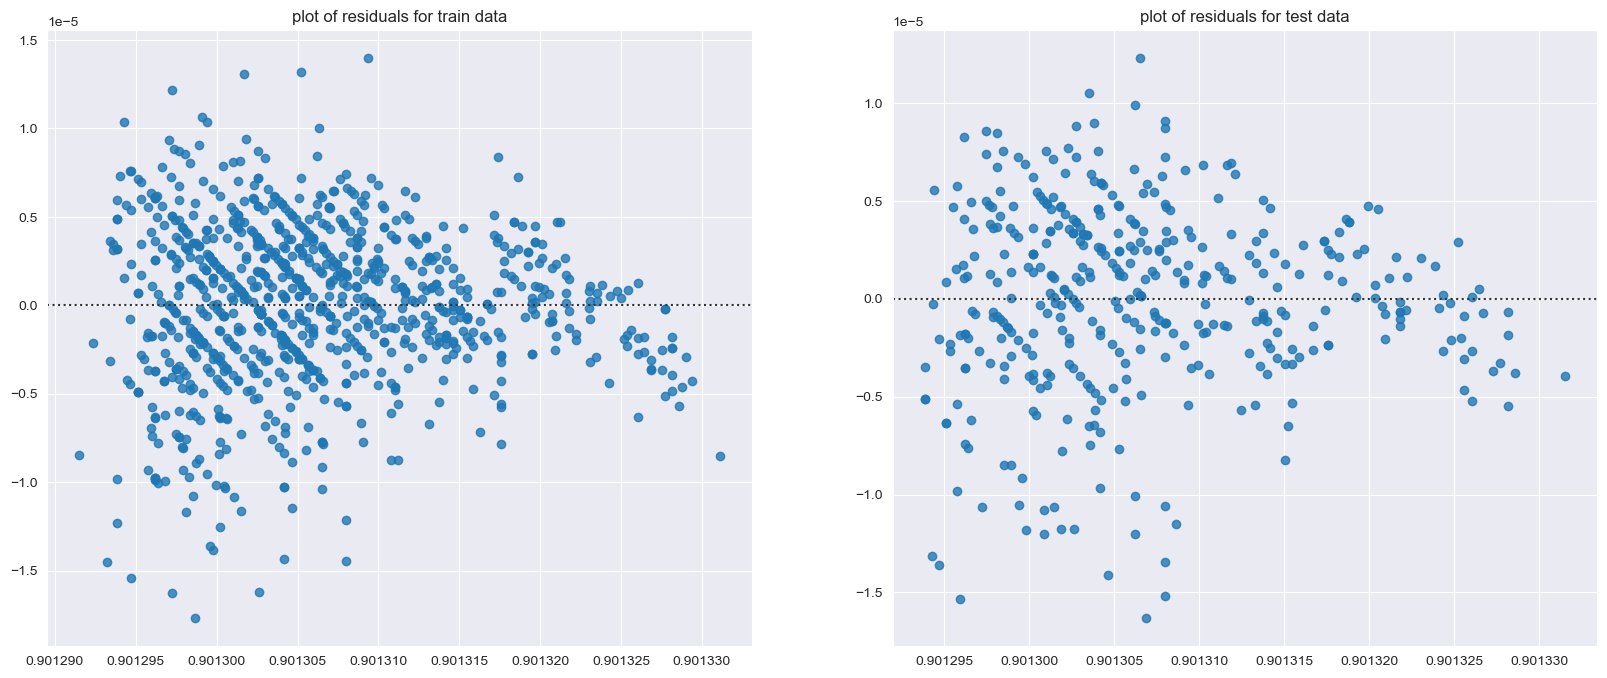

In [96]:
# Setting intercept as true
lgr3=LinearRegression(fit_intercept=True)

# Model
model_lin3=lgr3.fit(X2_train,y2_train)

# Predicting model on test set
cars_predictions_lin3 = lgr3.predict(X2_test)


# Computing MSE and RMSE
lin_mse3 = mean_squared_error(y2_test, cars_predictions_lin3)
lin_rmse3 = np.sqrt(lin_mse3)
print(lin_rmse3)

# R squared value
r2_lin_test3=model_lin3.score(X2_test,y2_test)
r2_lin_train3=model_lin3.score(X2_train,y2_train)
adj_r2=1-((1-r2_lin_test3)*(361/350))
print(adj_r2)
print(r2_lin_test3,r2_lin_train3)

# Regression diagnostics- Residual plot analysis
# residuals1=y_test-cars_predictions_lin1
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('plot of residuals for train data')
residuals2_=y2_train-lgr3.predict(X2_train)
sns.residplot(x=lgr3.predict(X2_train), y=residuals2_)
plt.subplot(1,2,2)
plt.title('plot of residuals for test data')
residuals3_=y2_test-cars_predictions_lin3
sns.residplot(x=cars_predictions_lin3, y=residuals3_)

Text(0.5, 1.0, 'test data')

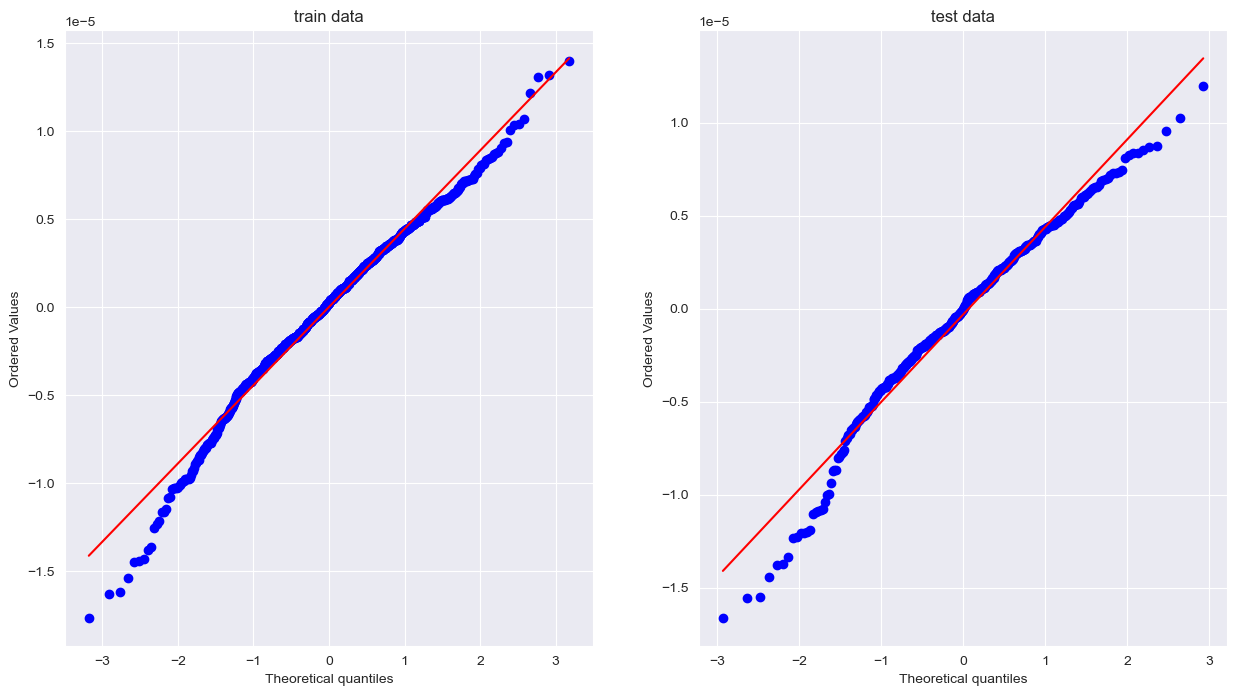

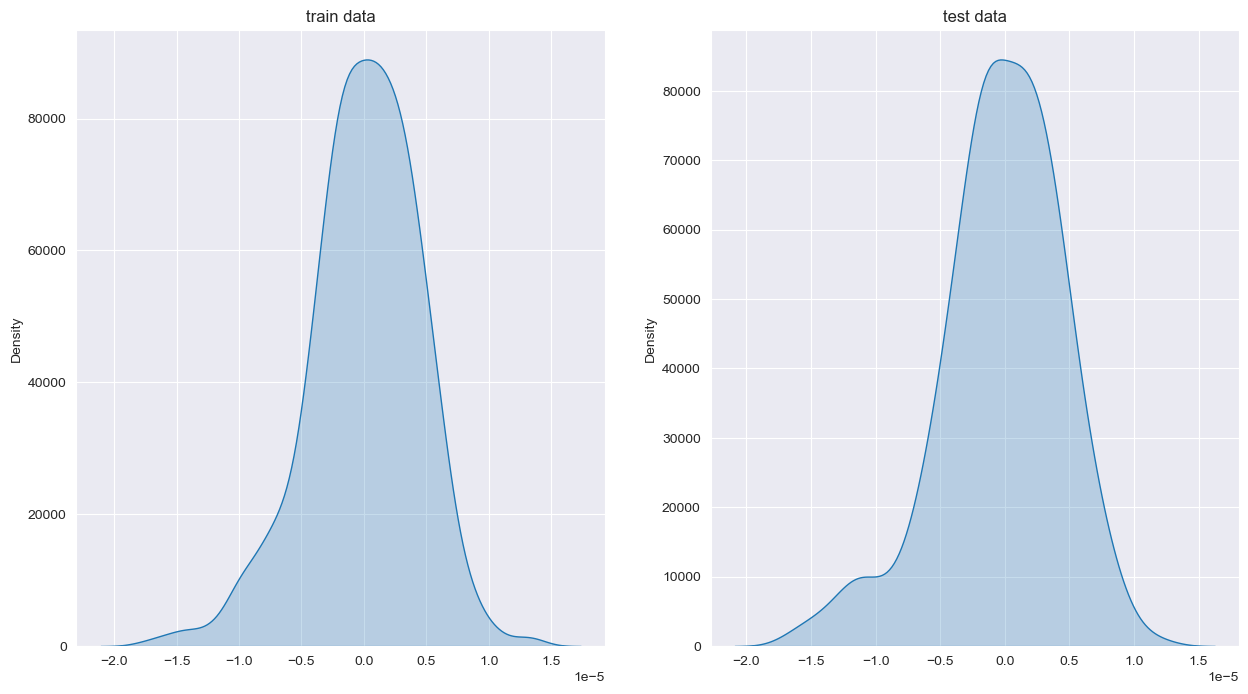

In [87]:
from scipy.stats import probplot
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
probplot(residuals2_,dist="norm",plot=plt)
plt.title("train data")
plt.subplot(1,2,2)
probplot(residuals3_,dist="norm",plot=plt)
plt.title("test data")
b=6 #not of any use
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.kdeplot(residuals2_,fill=True)
plt.title("train data")
plt.subplot(1,2,2)
sns.kdeplot(residuals3_,fill=True)
plt.title("test data")

# VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=[]
# for i in range(z.shape[1]):
#     vif.append(variance_inflation_factor(z,i))
# df=pd.DataFrame({'vif':vif},index=z.columns.T)
# df
z=df_new.select_dtypes(exclude=[object])
features = [ 'Age','HP','CC','Weight','KM']
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(z[features].values, i) for i in range(len(features))]
print(vif_data)

  Feature         VIF
0     Age   13.899203
1      HP   59.210593
2      CC  142.408703
3  Weight  187.485784
4      KM    8.500400


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=[]
# for i in range(z.shape[1]):
#     vif.append(variance_inflation_factor(z,i))
# df=pd.DataFrame({'vif':vif},index=z.columns.T)
# df
z=df_new.select_dtypes(exclude=[object])
features = [ 'Age','HP','CC','KM']
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(z[features].values, i) for i in range(len(features))]
print(vif_data)

  Feature        VIF
0     Age  13.374682
1      HP  45.322792
2      CC  52.071054
3      KM   8.438702


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=[]
# for i in range(z.shape[1]):
#     vif.append(variance_inflation_factor(z,i))
# df=pd.DataFrame({'vif':vif},index=z.columns.T)
# df
z=df_new.select_dtypes(exclude=[object])
features = [ 'Age','HP','KM']
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(z[features].values, i) for i in range(len(features))]
print(vif_data)

  Feature        VIF
0     Age  13.288422
1      HP   8.132249
2      KM   6.185952


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=[]
# for i in range(z.shape[1]):
#     vif.append(variance_inflation_factor(z,i))
# df=pd.DataFrame({'vif':vif},index=z.columns.T)
# df
z=df_new.select_dtypes(exclude=[object])
features = [ 'Age','HP']
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(z[features].values, i) for i in range(len(features))]
print(vif_data)

  Feature     VIF
0     Age  8.1322
1      HP  8.1322
